<a href="https://colab.research.google.com/github/Codecroc/wasteglas/blob/master/container_audio_mic_array_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

from glob import glob
import os
import librosa as lr
import librosa.display

In [51]:
dt = 1e-4                    # Diskretisierung Zeitachse, =1/f
n_t = int( 2/dt )            # Anzahl der diskreten Zeitschritte
t = np.arange( 0,n_t*dt,dt ) # Zeitachse
mic = np.zeros( (2,n_t) )    # Mikrofon[kanal, zeitschritt]

In [52]:
c = 330  # Schallgeschwindigkeit
mic_pos = np.array( [ [-0.05, 0, 0],  [0.05, 0, 0]] )

In [53]:
def calc_ds(mic_pos, source_x, source_y):
  source_pos = [ source_x, source_y, 0 ]
  s_per_mic = [ np.linalg.norm( mic_pos[i] - source_pos ) for i in range(mic_pos.shape[0]) ]
  delta_s = s_per_mic[1] - s_per_mic[0]
  return delta_s

In [54]:
for y in np.arange( -1.2, 0, 0.1 ):
  delta_t = []
  delta_s = []
  x = [-0.5, 0.0, 0.5]
  for xx in x:
    ds = calc_ds(mic_pos, xx, y)
    delta_s.append( ds )
    delta_t.append( ds / c )
  print(f"y= {y:.2f}  delta_s = {delta_s} m  delta_t = {delta_t} s")

y= -1.20  delta_s = [0.038437316446778835, 0.0, -0.038437316446778835] m  delta_t = [0.0001164767165053904, 0.0, -0.0001164767165053904] s
y= -1.10  delta_s = [0.04135095522441312, 0.0, -0.04135095522441312] m  delta_t = [0.000125305924922464, 0.0, -0.000125305924922464] s
y= -1.00  delta_s = [0.044685611078267184, 0.0, -0.044685611078267184] m  delta_t = [0.0001354109426614157, 0.0, -0.0001354109426614157] s
y= -0.90  delta_s = [0.04852056561154394, 0.0, -0.04852056561154394] m  delta_t = [0.0001470320170046786, 0.0, -0.0001470320170046786] s
y= -0.80  delta_s = [0.052946404413089065, 0.0, -0.052946404413089065] m  delta_t = [0.00016044364973663352, 0.0, -0.00016044364973663352] s
y= -0.70  delta_s = [0.0580588418835809, 0.0, -0.0580588418835809] m  delta_t = [0.0001759358844956997, 0.0, -0.0001759358844956997] s
y= -0.60  delta_s = [0.0639410298049854, 0.0, -0.0639410298049854] m  delta_t = [0.0001937606963787436, 0.0, -0.0001937606963787436] s
y= -0.50  delta_s = [0.0706222350122398

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

Text(0, 0.5, 'Wegunterschied Mikrofone (m)')

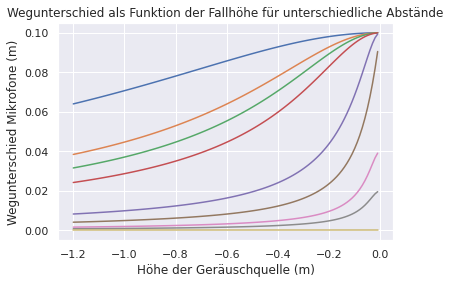

In [56]:
for x in [-1.0, -0.5, -0.4, -0.3, -0.1, -0.05, -0.02, -0.01, 0.0]:
  y = np.arange( -1.2, 0, 0.01 )
  plt.plot( y, calc_ds(mic_pos, x, y) )
plt.title('Wegunterschied als Funktion der Fallhöhe für unterschiedliche Abstände')
plt.xlabel('Höhe der Geräuschquelle (m)')
plt.ylabel('Wegunterschied Mikrofone (m)')